# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: ({len(cities)})")


Number of cities in the list: (614)


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [30]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"https://api.openweathermap.org/data/2.5/weather?&q={city}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather =  requests.get(city_url).json()
        test = city_weather['weather']

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]['lat']  
        city_lng = city_weather["coord"]['lon']
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"] 
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                           "Lat": city_lat, 
                           "Lng": city_lng, 
                           "Max Temp": city_max_temp,
                           "Humidity": city_humidity,
                           "Cloudiness": city_clouds,
                           "Wind Speed": city_wind,
                           "Country": city_country,
                           "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        print(city_url)
        pass
        
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hobart
Processing Record 2 of Set 1 | huarmey
Processing Record 3 of Set 1 | novobiryusinskiy
Processing Record 4 of Set 1 | mahebourg
Processing Record 5 of Set 1 | talara
Processing Record 6 of Set 1 | kodiak
Processing Record 7 of Set 1 | vaini
Processing Record 8 of Set 1 | khatanga
Processing Record 9 of Set 1 | carstairs
Processing Record 10 of Set 1 | bethel
Processing Record 11 of Set 1 | sao joao da barra
Processing Record 12 of Set 1 | hermanus
Processing Record 13 of Set 1 | khani
Processing Record 14 of Set 1 | hualmay
Processing Record 15 of Set 1 | dikson
Processing Record 16 of Set 1 | nanortalik
Processing Record 17 of Set 1 | uvalde
Processing Record 18 of Set 1 | chuy
Processing Record 19 of Set 1 | airai
Processing Record 20 of Set 1 | saint-philippe
Processing Record 21 of Set 1 | sentyabrskiy
City not found. Skipping...
https://api.openweathermap.org/data/2.5/weather?&q=senty

Processing Record 1 of Set 4 | margate
Processing Record 2 of Set 4 | fortuna
Processing Record 3 of Set 4 | torbay
Processing Record 4 of Set 4 | pangody
Processing Record 5 of Set 4 | labuhan
Processing Record 6 of Set 4 | puerto lempira
Processing Record 7 of Set 4 | caraballeda
Processing Record 8 of Set 4 | fuzhou
Processing Record 9 of Set 4 | bure
Processing Record 10 of Set 4 | beyneu
Processing Record 11 of Set 4 | tiksi
Processing Record 12 of Set 4 | ostrovnoy
Processing Record 13 of Set 4 | bereznik
Processing Record 14 of Set 4 | porto nacional
Processing Record 15 of Set 4 | westport
Processing Record 16 of Set 4 | tateyama
Processing Record 17 of Set 4 | iqaluit
Processing Record 18 of Set 4 | novorzhev
Processing Record 19 of Set 4 | umzimvubu
City not found. Skipping...
https://api.openweathermap.org/data/2.5/weather?&q=umzimvubu&appid=bd4895d3c61d8b521d4bb73fcc45ceff&units=metric
Processing Record 20 of Set 4 | regeneracao
Processing Record 21 of Set 4 | bathsheba
Pro

Processing Record 12 of Set 7 | zabaykalsk
Processing Record 13 of Set 7 | tutoia
Processing Record 14 of Set 7 | oranjemund
Processing Record 15 of Set 7 | kilindoni
Processing Record 16 of Set 7 | charleston
Processing Record 17 of Set 7 | aranda de duero
Processing Record 18 of Set 7 | phangnga
Processing Record 19 of Set 7 | inhambane
Processing Record 20 of Set 7 | krasnyy
Processing Record 21 of Set 7 | taklisah
Processing Record 22 of Set 7 | moose factory
Processing Record 23 of Set 7 | ranong
Processing Record 24 of Set 7 | huadian
Processing Record 25 of Set 7 | caucaia
Processing Record 26 of Set 7 | blagoevgrad
Processing Record 27 of Set 7 | mogadouro
Processing Record 28 of Set 7 | independencia
Processing Record 29 of Set 7 | sao felix do xingu
Processing Record 30 of Set 7 | miranda
Processing Record 31 of Set 7 | tungkang
City not found. Skipping...
https://api.openweathermap.org/data/2.5/weather?&q=tungkang&appid=bd4895d3c61d8b521d4bb73fcc45ceff&units=metric
Processin

Processing Record 23 of Set 10 | zhigansk
Processing Record 24 of Set 10 | half moon bay
Processing Record 25 of Set 10 | nocaima
Processing Record 26 of Set 10 | san cristobal
Processing Record 27 of Set 10 | port augusta
Processing Record 28 of Set 10 | wasilla
Processing Record 29 of Set 10 | eirunepe
Processing Record 30 of Set 10 | marquette
Processing Record 31 of Set 10 | dossor
Processing Record 32 of Set 10 | eureka
Processing Record 33 of Set 10 | balsas
Processing Record 34 of Set 10 | marevo
Processing Record 35 of Set 10 | asilah
Processing Record 36 of Set 10 | sovetskaya gavan
Processing Record 37 of Set 10 | acapulco
Processing Record 38 of Set 10 | piacabucu
Processing Record 39 of Set 10 | kolokani
Processing Record 40 of Set 10 | bredy
Processing Record 41 of Set 10 | ipu
Processing Record 42 of Set 10 | willowmore
Processing Record 43 of Set 10 | luderitz
Processing Record 44 of Set 10 | matam
Processing Record 45 of Set 10 | nhulunbuy
Processing Record 46 of Set 10

In [31]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64

In [32]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hobart,-42.8794,147.3294,13.92,68,100,4.63,AU,1675783416
1,huarmey,-10.0681,-78.1522,24.26,75,49,3.37,PE,1675783509
2,novobiryusinskiy,56.9578,97.7076,-19.08,100,100,1.25,RU,1675783510
3,mahebourg,-20.4081,57.7000,26.81,78,60,6.28,MU,1675783510
4,talara,-4.5772,-81.2719,29.42,54,40,7.20,PE,1675783511


In [34]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [35]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hobart,-42.8794,147.3294,13.92,68,100,4.63,AU,1675783416
1,huarmey,-10.0681,-78.1522,24.26,75,49,3.37,PE,1675783509
2,novobiryusinskiy,56.9578,97.7076,-19.08,100,100,1.25,RU,1675783510
3,mahebourg,-20.4081,57.7000,26.81,78,60,6.28,MU,1675783510
4,talara,-4.5772,-81.2719,29.42,54,40,7.20,PE,1675783511


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

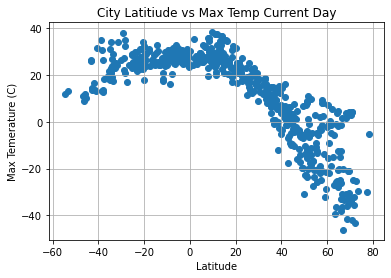

In [36]:
# Build scatter plot for latitude vs. temperature
fig1 = plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'])

# Incorporate the ptother graph properties
plt.title('City Latitiude vs Max Temp Current Day')
plt.ylabel('Max Temerature (C)')
plt.xlabel('Latitude')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

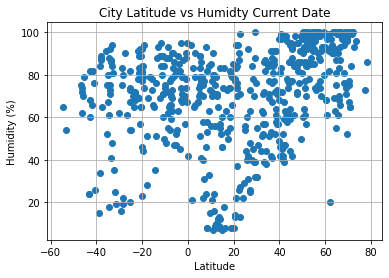

In [40]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])
plt.title('City Latitude vs Humidty Current Date')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')

# Incorporate the other graph properties
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

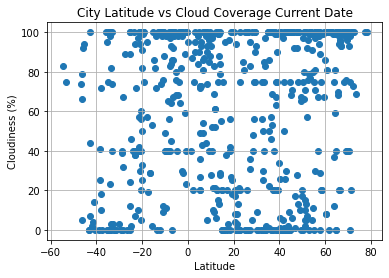

In [42]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'])
plt.title('City Latitude vs Cloud Coverage Current Date')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')

# Incorporate the other graph properties
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

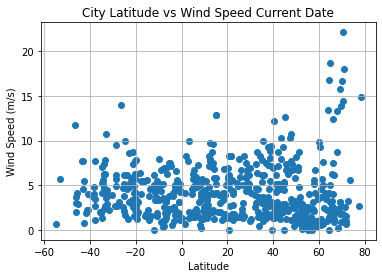

In [44]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.title('City Latitude vs Wind Speed Current Date')
plt.ylabel('Wind Speed (m/s)')
plt.xlabel('Latitude')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7161472181434118


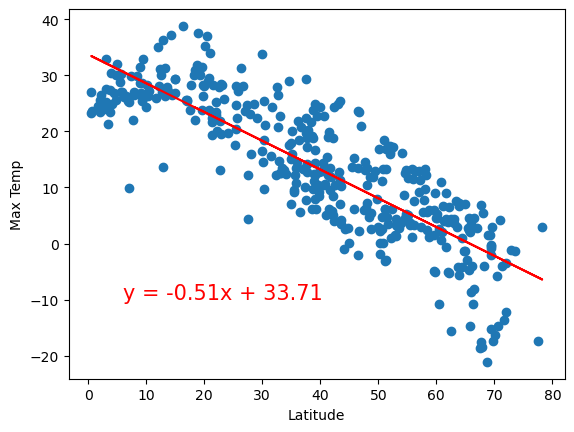

In [15]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.4121057168607245


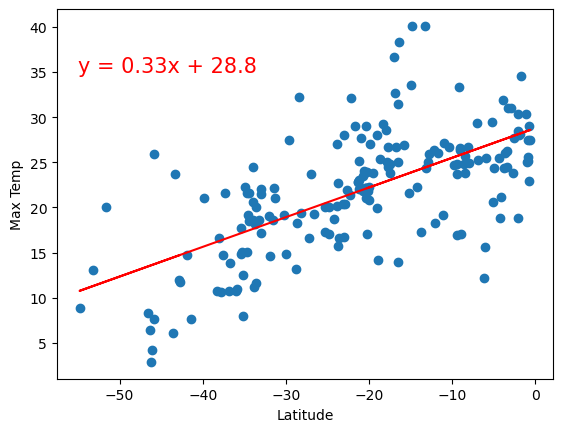

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


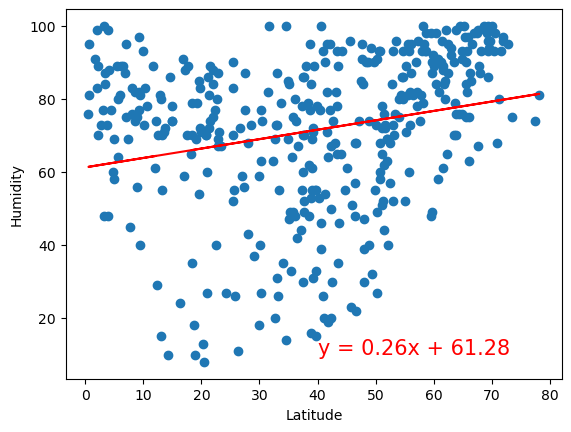

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.0002808747046324607


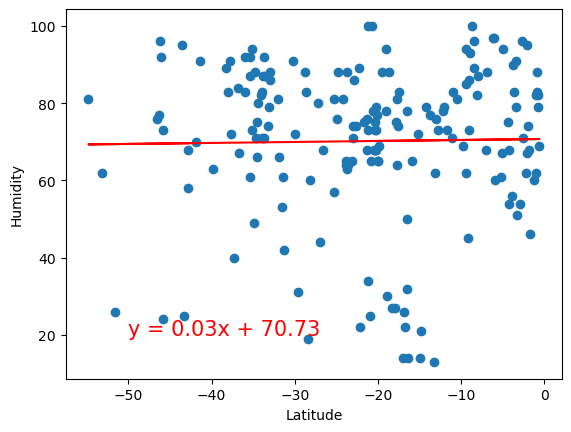

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


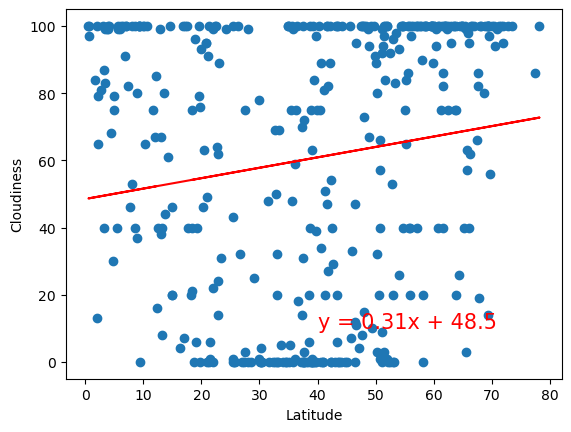

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


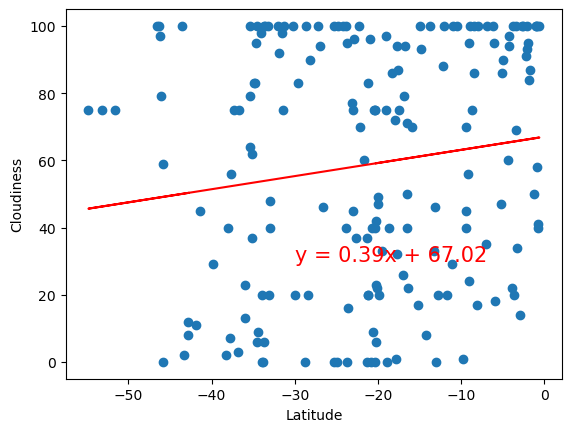

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


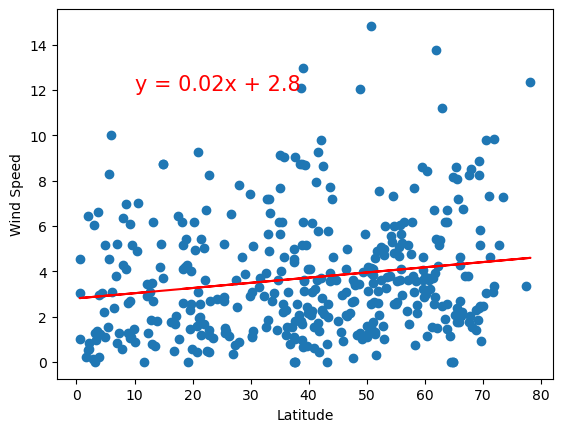

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


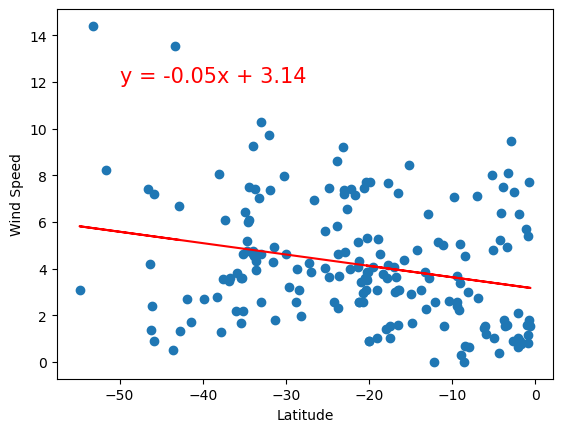

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE